<a href="https://colab.research.google.com/github/Rhatanii/Project_AI_medical/blob/main/Challenge_2017142049_%EB%9D%BC%ED%98%95%EC%84%AD_%EC%B5%9C%EC%A2%85code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. DICOM 데이터 파일 불러오기

In [ ]:
# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pydicom 모듈 설치
!pip install pydicom
#mat파일을 위한 scipy
!pip install scipy
#Albumentation, 다양한 data augmentation을 위해
!pip install albumentations==0.4.6
#!pip install tqdm

     |████████████████████████████████| 2.0 MB 4.2 MB/s 
     |████████████████████████████████| 117 kB 4.2 MB/s 
     |████████████████████████████████| 948 kB 17.4 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65172 sha256=a568d8ef16c67dffc28be135ff94cfec5261d36386cf50270c5bed67ea007cda
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
#dicom 파일 전처리에 필요
!pip install pylibjpeg 
!pip install python-gdcm
!pip install pillow

     |████████████████████████████████| 884 kB 5.5 MB/s 
     |████████████████████████████████| 3.6 MB 62.9 MB/s 
     |████████████████████████████████| 9.4 MB 4.1 MB/s 


In [ ]:
# os.listdir 숫자 기준 정렬을 위해
!pip install natsort

In [ ]:
import os
import glob
import numpy as np

import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import albumentations as A
from albumentations.pytorch import transforms
from albumentations.pytorch import ToTensorV2

from torch._C import dtype
from torch.utils.data import DataLoader

- dicom data 출력 확인 + mat파일 출력 확인
- 처음 시행에서는 numpy 불러오는 것 관련해서 error 발생
- 아래 pip unistall numpy 코드 실행 후, restart runtime 
- 위 import 코드 부터 재 실행하면 된다.

dicom 파일과 label 이미지 출력해볼 수 있다.

14
0.15826416015625 0.84161376953125
MONOCHROME2
8191 11196
1 0
14699 2005
전처리 결과 0.6833496 0.0
전처리 하지 않은 결과 14699 2005
<class 'numpy.ndarray'>
(3264, 2132, 7)


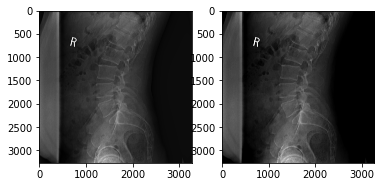

In [ ]:
import pydicom as dicom
from matplotlib import pyplot as plt
import pylibjpeg
import gdcm
from scipy import io

input_path = '/content/drive/MyDrive/challenge_data_dicom/train/img/'
dicom_path = input_path + '021.dcm'
ds = dicom.read_file(dicom_path)


#dicom 파일 기본 특성 확인
pixel_array = ds.pixel_array
pixel_array1 = ds.pixel_array #전처리 진행 안하는 pixel_array

Rescale_slope = ds.RescaleSlope
Rescale_intercept = ds.RescaleIntercept
Window_center = ds.WindowCenter
Window_width = ds.WindowWidth
Photometric_interpretation = ds.PhotometricInterpretation
Bitstored = ds.BitsStored
max = pixel_array.max()
min = pixel_array.min()
lwin = Window_center - Window_width/2
lwin = lwin/(2**Bitstored)
rwin = Window_center + Window_width/2
rwin = rwin/(2**Bitstored)

#Bitstored 이용하여 normalize dicom image전처리
pixel_array = pixel_array.astype(np.float32)
pixel_array=pixel_array/(2**Bitstored)

#Window로 전처리
pixel_array[np.where(pixel_array<lwin)] = lwin
pixel_array[np.where(pixel_array>rwin)] = rwin
pixel_array = pixel_array - lwin

#속성 확인
print(Bitstored)
print(lwin,rwin)
print(Photometric_interpretation)
print(Window_center,Window_width)
print(Rescale_slope,Rescale_intercept)
print(max, min)
print('전처리 결과',pixel_array.max(), pixel_array.min())
print('전처리 하지 않은 결과', pixel_array1.max(), pixel_array1.min())


# 매트랩 mat 파일 읽기
label_path = '/content/drive/MyDrive/challenge_data_dicom/train/label/'
mat_path = label_path + '066.mat'
mat_file = io.loadmat(mat_path)

mat_file_name = "label_separated.mat"
mat_file_value = mat_file[mat_file_name[:-4]]

mat = mat_file_value
print(type(mat))

fig = plt.figure()
rows = 1
cols = 2
print(mat_file_value.shape)

#input
ax1 = fig.add_subplot(rows,cols,1)
ax1.imshow(pixel_array1, cmap='gray')

#label
ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(pixel_array, cmap='gray')


-*** 주의: 
### 첫번째 시행에서는 위에서 pydicom이 안읽힘

### pip uninstall numpy 코드 진행후
###Process -y 입력
###restart runtime 진행
###이후 이 코드 실행 x


In [ ]:
!pip uninstall numpy
!pip install numpy

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.19.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-09e95953.3.13.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.19.5
     |████████████████████████████████| 15.7 MB 4.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 wh

# 3. Dataset function


In [ ]:
import torch
import natsort
class Dataset(torch.utils.data.Dataset):
  def __init__(self, data_dir,transform = None):
    self.data_dir =data_dir # train, val, test 구분
    self.transform =transform

    #img, label 파일 구분
    self.data_dir_input = self.data_dir +'img'
    self.data_dir_label = self.data_dir +'label'

    #img, label에 있는 파일들 볼 수 있음 +숫자 순서대로 정렬
    list=os.listdir(self.data_dir_input)
    self.input=natsort.natsorted(list)
    
    list1=os.listdir(self.data_dir_label)
    self.label=natsort.natsorted(list1)

  def __len__(self):
    return len(self.label)

  def __getitem__(self,index):
    #os.listdir는 모든 파일과 dir 보여줌, np로 가져오기
    input_temp = dicom.read_file(os.path.join(self.data_dir_input,self.input[index]))
    input = input_temp.pixel_array
    
    #label
    label = io.loadmat(os.path.join(self.data_dir_label,self.label[index]))["label_separated"]

    #여기에서 input dicom 파일 전처리를 위한 변수
    Rescale_slope = input_temp.RescaleSlope
    Rescale_intercept = input_temp.RescaleIntercept
    Window_center = input_temp.WindowCenter
    Window_width = input_temp.WindowWidth
    Photometric_interpretation = input_temp.PhotometricInterpretation
    Bitstored = input_temp.BitsStored
    lwin = (Window_center - Window_width/2)/(2**Bitstored)
    rwin = (Window_center + Window_width/2)/(2**Bitstored)

    #Bitstored 이용하여 normalize dicom image전처리
    input = input.astype(np.float32)
    input = input/(2**Bitstored)

    #Window로 전처리
    input[np.where(input<lwin)] = lwin
    input[np.where(input>rwin)] = rwin
    input = input - lwin

    if input.ndim ==2:
      input = input[:,:,np.newaxis]

    #transform에 의해서는 input과 label 공통된 처리만
    if self.transform:
  #######concat으로 시도
      # C = np.concatenate((input,label),axis=2)
      # data=self.transform(image = C)
      # data_img = data["image"][0,...]
      # data_label = data["image"][1:8,...]
      # torch.manual_seed(10)
  ####################기본
      data=self.transform(image = input ,mask = label)
      data_img = data["image"]
      data_label = data["mask"]
############transform으로 시도
    # if self.transform:
    #   torch.manual_seed(10)
    #   data_img = self.transform(input)
    # if self.transform:
    #   torch.manual_seed(10)
    #   data_label = self.transform(label)  

    # data = {'input': data_img, 'label': data_label}
    return data_img, data_label


# 4. Model 설정

## 4-1) UNet

In [ ]:
import torchvision.transforms.functional as TF

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )
    def forward(self, x):
        return self.conv(x)

class UNET(nn.Module):
    def __init__(self, in_channels=3, out_channels=1, features=[64, 128, 256, 512],):
        super(UNET, self).__init__()
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Down part of UNET
        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))
            in_channels = feature

        # Up part of UNET
        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(
                    feature*2, feature, kernel_size=2, stride=2,
                )
            )
            self.ups.append(DoubleConv(feature*2, feature))

        self.bottleneck = DoubleConv(features[-1], features[-1]*2)
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def forward(self, x):
        
        skip_connections = []

        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)

        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1] #skip connection에 저장한 순서와 반대로 넣어줘야함. ::-1이 그 동작임

        for idx in range(0, len(self.ups), 2): 
            x = self.ups[idx](x)
            skip_connection = skip_connections[idx//2] 

            if x.shape != skip_connection.shape:
                x = TF.resize(x, size=skip_connection.shape[2:])

            concat_skip = torch.cat((skip_connection, x), dim=1)
            x = self.ups[idx+1](concat_skip) 
        
        return self.final_conv(x)

##4-2 Unet ++

In [ ]:
class Unet_block(nn.Module):
    def __init__(self, in_channels, mid_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, mid_channels, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(mid_channels)
        self.conv2 = nn.Conv2d(mid_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)        
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        return out

class Nested_UNet(nn.Module):
    def __init__(self, num_classes, input_channels=3, deep_supervision=False):
        super().__init__()

        num_filter = [32, 64, 128, 256, 512]
        self.deep_supervision = deep_supervision
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        # DownSampling
        self.conv0_0 = Unet_block(input_channels, num_filter[0], num_filter[0])
        self.conv1_0 = Unet_block(num_filter[0], num_filter[1], num_filter[1])
        self.conv2_0 = Unet_block(num_filter[1], num_filter[2], num_filter[2])
        self.conv3_0 = Unet_block(num_filter[2], num_filter[3], num_filter[3])
        self.conv4_0 = Unet_block(num_filter[3], num_filter[4], num_filter[4])

        # Upsampling & Dense skip
        # N to 1 skip
        self.conv0_1 = Unet_block(num_filter[0] + num_filter[1], num_filter[0], num_filter[0])
        self.conv1_1 = Unet_block(num_filter[1] + num_filter[2], num_filter[1], num_filter[1])
        self.conv2_1 = Unet_block(num_filter[2] + num_filter[3], num_filter[2], num_filter[2])
        self.conv3_1 = Unet_block(num_filter[3] + num_filter[4], num_filter[3], num_filter[3])
       
        # N to 2 skip
        self.conv0_2 = Unet_block(num_filter[0]*2 + num_filter[1], num_filter[0], num_filter[0])
        self.conv1_2 = Unet_block(num_filter[1]*2 + num_filter[2], num_filter[1], num_filter[1])
        self.conv2_2 = Unet_block(num_filter[2]*2 + num_filter[3], num_filter[2], num_filter[2])

        # N to 3 skip
        self.conv0_3 = Unet_block(num_filter[0]*3 + num_filter[1], num_filter[0], num_filter[0])
        self.conv1_3 = Unet_block(num_filter[1]*3 + num_filter[2], num_filter[1], num_filter[1])

        # N to 4 skip
        self.conv0_4 = Unet_block(num_filter[0]*4 + num_filter[1], num_filter[0], num_filter[0])

        if self.deep_supervision:
            self.output1 = nn.Conv2d(num_filter[0], num_classes, kernel_size=1)
            self.output2 = nn.Conv2d(num_filter[0], num_classes, kernel_size=1)
            self.output3 = nn.Conv2d(num_filter[0], num_classes, kernel_size=1)
            self.output4 = nn.Conv2d(num_filter[0], num_classes, kernel_size=1)

        else:
            self.output = nn.Conv2d(num_filter[0], num_classes, kernel_size=1)

    def forward(self, x):                    # (Batch, 3, 256, 256)

        x0_0 = self.conv0_0(x)               
        x1_0 = self.conv1_0(self.pool(x0_0))
        x0_1 = self.conv0_1(torch.cat([x0_0, self.up(x1_0)], dim=1))
        
        x2_0 = self.conv2_0(self.pool(x1_0))
        x1_1 = self.conv1_1(torch.cat([x1_0, self.up(x2_0)], dim=1))
        x0_2 = self.conv0_2(torch.cat([x0_0, x0_1, self.up(x1_1)], dim=1))

        x3_0 = self.conv3_0(self.pool(x2_0))
        x2_1 = self.conv2_1(torch.cat([x2_0, self.up(x3_0)], dim=1))
        x1_2 = self.conv1_2(torch.cat([x1_0, x1_1, self.up(x2_1)], dim=1))
        x0_3 = self.conv0_3(torch.cat([x0_0, x0_1, x0_2, self.up(x1_2)], dim=1))

        x4_0 = self.conv4_0(self.pool(x3_0))
        x3_1 = self.conv3_1(torch.cat([x3_0, self.up(x4_0)], dim=1))
        x2_2 = self.conv2_2(torch.cat([x2_0, x2_1, self.up(x3_1)], dim=1))
        x1_3 = self.conv1_3(torch.cat([x1_0, x1_1, x1_2, self.up(x2_2)], dim=1))
        x0_4 = self.conv0_4(torch.cat([x0_0, x0_1, x0_2, x0_3, self.up(x1_3)], dim=1))

        if self.deep_supervision:
            output1 = self.output1(x0_1)
            output2 = self.output2(x0_2)
            output3 = self.output3(x0_3)
            output4 = self.output4(x0_4)
            output = (output1 + output2 + output3 + output4) / 4
        else:
            output = self.output(x0_4)

        return output


# 5. parameters

- dataset, dataloader 생성

In [ ]:
data_dir = '/content/drive/MyDrive/challenge_data_dicom/'
from torchvision import transforms
batch_size = 20
LEARNING_RATE= 1e-3

# transform에 사용하는 parameters
IMAGE_HEIGHT = 96  
IMAGE_WIDTH = 96  

transform_train = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            # A.Rotate(limit=20, p=1), #-20~20
            # A.HorizontalFlip(p=0.5),
            A.Normalize(
                mean=[0.0],
                std=[1.0],
                max_pixel_value=1.0,
            ),
            ToTensorV2(),
        ],
    )
# transform_train1 = transforms.Compose(
#         [   transforms.ToPILImage(),
#             transforms.Resize((IMAGE_HEIGHT,IMAGE_WIDTH)),
#             transforms.RandomRotation(degrees=20), 
#             #transforms.HorizontalFlip(p=0.5),
#             transforms.ToTensor(),
#             transforms.Normalize(
#                 mean=0.0,
#                 std=1.0,
#             ),
            
#         ],
#     )
transform_val =A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Normalize(
                mean=[0.0],
                std=[1.0],
                max_pixel_value=1.0,
            ),
            ToTensorV2(),
        ],
    )

# Train Dataset, Dataloader 생성
dataset_train = Dataset(data_dir=os.path.join(data_dir,'train/'), transform = transform_train) #
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=0)

#validation 평가시 이용
# dataset_val = Dataset(data_dir=os.path.join(data_dir,'train_val/val1/'), transform = transform_val) 
# loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False, num_workers=0)


- 생성된 dataset 확인해볼 수 있음.

(1, 96, 96)
label shape (96, 96, 7)


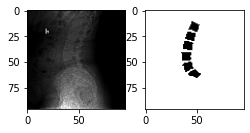

In [ ]:
import cv2
#trainset 거친 후 확인 과정
# input data는 CHW로 변환 되는데 label data는 HWC 그대로 인것을 확인 => train에서 추가로 진행해줌
fig = plt.figure()
rows = 1
cols = 3

#train-input
i=7
input = dataset_train[i][0][0,...].numpy() #1channel이여서 확인하려면 index0.
input1 = dataset_train[i][0].numpy() #train input의 shape을 확인하기 위해 다 가져옴
print(input1.shape) #CHW

#train-label
label=dataset_train[i][1][...,6].numpy() #
label1 = dataset_train[i][1].numpy()
print('label shape',label1.shape) #HWC


ax1 = fig.add_subplot(rows,cols,1)
ax1.imshow(input, cmap='gray')

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(label, cmap='gray')

- 모델, optimizer

- Dice coefficient 함수

In [ ]:
#Dice coefficient loss func

def dice_loss(pred, target, smooth = 1e-5):
    # binary cross entropy loss, BCE 사용하면 음의 값 나오는 상황...
    #bce = F.binary_cross_entropy_with_logits(pred, target, reduction='mean')
    
    #pred에 sigmoid를 줘야할까 => 0~1사이로 값 맞춰주기 위해
    pred = torch.sigmoid(pred)
    intersection = pred * target
    union = pred + target
    
    # dice coefficient
    dice = 2.0 * (intersection.sum(dim=(2,3)) + smooth) / (union.sum(dim=(2,3)) + smooth)
    
    # dice loss
    dice_loss = 1.0 - dice
    
    # total loss
    loss =dice_loss #+ bce
    
    return loss.sum()


In [ ]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# U-net
#my_model = UNET(in_channels=1, out_channels=7).to(device=DEVICE)

#U-net ++
my_model = Nested_UNet(num_classes = 7,input_channels=1).to(device=DEVICE)


#Optimizer
my_optimizer = optim.Adam(my_model.parameters(), lr=LEARNING_RATE)

#Scaler
scaler = torch.cuda.amp.GradScaler()

# # of epoch
num_epoch = 100

- 학습된 가중치 불러오기

In [ ]:
PATH= '/content/drive/MyDrive/challenge_data_dicom/Store/weights/'
def save_checkpoint(state, filename=PATH+"my_checkpoint_ver4.1_valid_unetplus.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)

def load_checkpoint(checkpoint, model):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])

In [ ]:
#my_model = UNET(in_channels=1, out_channels=7).to(device=DEVICE)
my_model = Nested_UNet(num_classes = 7,input_channels=1).to(device=DEVICE)
my_optimizer = optim.Adam(my_model.parameters(), lr=LEARNING_RATE)

load_checkpoint(torch.load(PATH+"my_checkpoint_ver4.1_valid_unetplus.pth.tar"), my_model)

scaler = torch.cuda.amp.GradScaler()
#이렇게 불러온 이후에 
#학습에 사용할 거면 
my_model.train()

#평가에 사용시
#my_model.eval()

=> Loading checkpoint


Nested_UNet(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (up): Upsample(scale_factor=2.0, mode=bilinear)
  (conv0_0): Unet_block(
    (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (conv1_0): Unet_block(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (conv2_0): Unet_block(
    (conv1): Conv2d(64, 128,

# 6. Network training

## 6-1 network train

Epoch: (0 / 100)
Epoch 1 ,training Dice loss: 122.590
=> Saving checkpoint
Epoch: (1 / 100)
Epoch 2 ,training Dice loss: 121.022
=> Saving checkpoint
Epoch: (2 / 100)
Epoch 3 ,training Dice loss: 119.698
=> Saving checkpoint
Epoch: (3 / 100)
Epoch 4 ,training Dice loss: 118.912
=> Saving checkpoint
Epoch: (4 / 100)
Epoch 5 ,training Dice loss: 118.439
=> Saving checkpoint
Epoch: (5 / 100)
Epoch 6 ,training Dice loss: 118.099
=> Saving checkpoint
Epoch: (6 / 100)
Epoch 7 ,training Dice loss: 117.617
=> Saving checkpoint
Epoch: (7 / 100)
Epoch 8 ,training Dice loss: 117.279
=> Saving checkpoint
Epoch: (8 / 100)
Epoch 9 ,training Dice loss: 117.020
=> Saving checkpoint
Epoch: (9 / 100)
Epoch 10 ,training Dice loss: 116.668
=> Saving checkpoint
Epoch: (10 / 100)
Epoch 11 ,training Dice loss: 116.453
=> Saving checkpoint
Epoch: (11 / 100)
Epoch 12 ,training Dice loss: 116.082
=> Saving checkpoint
Epoch: (12 / 100)
Epoch 13 ,training Dice loss: 115.753
=> Saving checkpoint
Epoch: (13 / 100)


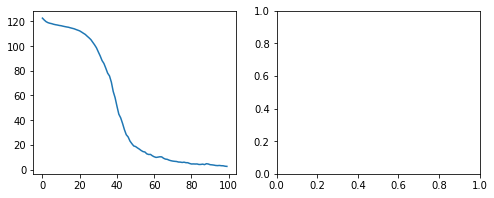

In [ ]:
PATH= '/content/drive/MyDrive/challenge_data_dicom/Store/weights/'

my_model.train()
running_loss = []
valid_loss = []
for epoch in range(num_epoch):
  run_loss = 0.0
  val_loss = 0.0
  print("Epoch: (%d / %d)" %(epoch,num_epoch))
  my_model.train()
  for i, (data, targets) in enumerate(loader_train): #HWC CHW
        # if(i%2 == 0):
        #   print("Epoch percentage: %.2f%% "%(i*100/(120/batch_size)))
        data = data.to(device=DEVICE) 
        targets = targets.float().to(device=DEVICE)
        if(targets.shape[1] != 7): #근데 애초에 이것도 변형 안되는게 이상한건데...1111111111111111111111111111111111111111111111111111111
          targets = targets.permute(0,3,1,2)
          
        # forward
        with torch.cuda.amp.autocast():
          predictions = my_model(data)
          loss = dice_loss(predictions, targets)
          
        # backward
        my_optimizer.zero_grad()
        
        #backpropagation
        scaler.scale(loss).backward()
        
        #1-step update on our parameter
        scaler.step(my_optimizer)
        scaler.update()
        run_loss += loss.item()

  # save running loss
  running_loss.append(run_loss/len(loader_train)) #epoch 1회당
  print('Epoch %d ,training Dice loss: %.3f' %(epoch + 1, run_loss/len(loader_train)))
  #1
  checkpoint = {# Pytorch에서 모델의 state_dict은 학습가능한 매개변수 (weight & bias)가 담겨있는 딕셔너리(Dictionary)입니다. 
                  "state_dict": my_model.state_dict(),
                  "optimizer":my_optimizer.state_dict(),}
  save_checkpoint(checkpoint)
    #2
  torch.save(my_model,PATH+'model.pt') #전체 모델 저장
  torch.save(my_model.state_dict(),PATH + 'model_state_dict.pt')
  torch.save({'model':my_model.state_dict(),
                        'optimizer':my_optimizer.state_dict()
                        }, PATH +'all.tar')              
        
  #########validation test
  # my_model.eval()
  # if(epoch %5 ==0):
  #   with torch.no_grad():
  #     for i, (data_valid, targets_valid) in enumerate(loader_val): #HWC CHW
  #       data_valid = data_valid.to(device=DEVICE) 
  #       targets_valid = targets_valid.float().to(device=DEVICE)
  #       if(targets_valid.shape[1] != 7): #HWC ->CHW
  #         targets_valid = targets_valid.permute(0,3,1,2)  

  #       with torch.cuda.amp.autocast():
  #         predictions_valid = my_model(data_valid)
  #         loss_valid = dice_loss(predictions_valid, targets_valid)  
  #         val_loss +=loss_valid.item()
    
  #     valid_loss.append(val_loss/len(loader_val))
  #     print('Epoch %d, Valid Dice loss: %.3f' %(epoch + 1, val_loss/len(loader_val)))


print('Finished Training')
#그래프로 training loss, valid loss
fig = plt.figure(figsize=(8,3))
ax1 =fig.add_subplot(1,2,1)
ax2 =fig.add_subplot(1,2,2)
ax1.plot(running_loss)
# ax2.plot(valid_loss)



- test용 dataset

# 7. Test

- test용 dataset 만들기, Dataset2, (output에서 height, width, name 출력 가능)

In [ ]:
#test용 dataset만들기

import torch
import natsort
class Dataset2(torch.utils.data.Dataset):
  def __init__(self, data_dir,transform = None):
    self.data_dir =data_dir # train, val, test 구분
    self.transform =transform

    #img 파일 구분
    self.data_dir_input = self.data_dir +'img'

    #img, label에 있는 파일들 볼 수 있음 +숫자 순서대로 정렬
    list=os.listdir(self.data_dir_input)
    self.input=natsort.natsorted(list)

  def __len__(self):
    return len(self.input)

  def __getitem__(self,index):
    #os.listdir는 모든 파일과 dir 보여줌, np로 가져오기
    input_temp = dicom.read_file(os.path.join(self.data_dir_input,self.input[index]))
    input = input_temp.pixel_array


    #여기에서 input dicom 파일 전처리를 위한 변수
    Rescale_slope = input_temp.RescaleSlope
    Rescale_intercept = input_temp.RescaleIntercept
    Window_center = input_temp.WindowCenter
    Window_width = input_temp.WindowWidth
    Photometric_interpretation = input_temp.PhotometricInterpretation
    Bitstored = input_temp.BitsStored
    lwin = (Window_center - Window_width/2)/(2**Bitstored)
    rwin = (Window_center + Window_width/2)/(2**Bitstored)

    #Bitstored 이용하여 normalize dicom image전처리
    input = input.astype(np.float32)
    input = input/(2**Bitstored)

    #Window로 전처리
    input[np.where(input<lwin)] = lwin
    input[np.where(input>rwin)] = rwin
    input = input - lwin

    #Height, width 추출해두기
    height = input.shape[0]
    width = input.shape[1]
    if input.ndim ==2:
      input = input[:,:,np.newaxis]

    #transform에 의해서 input처리
    if self.transform:
      data = self.transform(image=input)
      data_img = data["image"]
      # pixel_array, height, width, 파일명 순으로 추출 가능
      return data_img, height, width, self.input[index][:-4]

- test전용 trainset 생성

#파일 경로 맞는지 확인. 실제 test시 val대신 test쓸 것!!!!!!!!!!!!!!!!!!!

In [ ]:
####################################################
#평가 과정에서 필요한 transfomrm
transform_vall =A.Compose(
        [   A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Normalize(
                mean=[0.0],
                std=[1.0],
                max_pixel_value=1.0,
            ),
            ToTensorV2(),
        ],
    )
data_dir = '/content/drive/MyDrive/challenge_data_dicom/'
##############################실제 test시 val대신 test쓸 것##############################
dataset_vall = Dataset2(data_dir=os.path.join(data_dir,'val/'), transform = transform_vall) 
loader_vall = DataLoader(dataset_vall, batch_size=1, shuffle=False, num_workers=0)

맞는 파일 가져왔는지 확인


In [ ]:
print(dataset_vall[0][3])
print(len(dataset_vall))

151
20


- test용 이미지 넣어 segmentation 결과 추출하기

In [ ]:
#꼭, 학습된 모델 가져와서 돌렸는지 확인할 것, ##################
import copy
import cv2
my_model.eval()
count = 0
for i,(data,height,width,filename) in enumerate(loader_vall):
  data = data.to(device=DEVICE)  
  predictions = my_model(data) #tensor, BCHW

  #numpy 변환
  result_array = predictions.cpu().detach().numpy()

  #BCHW => HWC
  result_array = np.swapaxes(result_array,1,2) # BCHW => BHCW
  result_array = np.swapaxes(result_array,2,3) # BHCW => BHWC
  result_array = result_array[0,...] #Batch dim 삭제 =>HWC, 150x100x7

  #normalize ############ 1~6channel 정규화, 7channel 표준화
  ccc = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH, 7))
  for idx in range(7):
    if(idx != 6): #7번 채널 제외 하고 threshold = 0.5로 처리,0과 1의 중간값이므로
      bbb=copy.copy(result_array[...,idx])
      print('channel: ',idx,bbb.max(),bbb.min())
      term = bbb.max()-bbb.min()
      bbb =bbb/term
      min = bbb.min()
      bbb -= min
      bbb[np.where(bbb <0.5)] =0 
      ccc[...,idx]=bbb
      print(ccc[...,idx].max(),ccc[...,idx].min())
    else: #7채널 표준화 및 반전
        bbb=copy.copy(result_array[...,idx])
        mean = np.mean(bbb)
        std = np.std(bbb)
        bbb=(bbb-mean)/std
        bbb[np.where(bbb <0)] =0
        bbb[np.where(bbb>0)] = 1
        bbb=1-bbb
        bbb[np.where(bbb == 0)]=1e-2 
        ccc[...,idx]=bbb
        print(ccc[...,idx].max(),ccc[...,idx].min())


  # #분류기 criterion 생성
  criterion = np.argmax(ccc,axis=2) # criterion HW짜리
  print(np.unique(criterion)) # 상대적 크다고 판단된 값들 출력
  real_result = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH, 7)) # 결과 담을 numpy array

  # 1,0 classification
  for channel_idx in range(7):
    criterion_temp = copy.copy(criterion)   
    criterion_temp[np.where(criterion_temp ==channel_idx)] =10   
    criterion_temp[np.where(criterion_temp != 10)] = 0
    criterion_temp[np.where(criterion_temp == 10)] = 1 
    real_result[...,channel_idx] = criterion_temp
                                             
  # # #np.uint8                                            
  result = np.uint8(real_result)     
  
  # height,width tensor -> numpy ->int
  width = int(width.cpu().detach().numpy())
  height = int(height.cpu().detach().numpy())

  # tuple ->str
  filename = ''.join(filename) 

  try:
    #segmentation
    result = cv2.resize(real_result,(width,height),interpolation=cv2.INTER_LINEAR) 
    ##실수형태만 확인할 때 사용
    #result = cv2.resize(result_array,(width,height),interpolation=cv2.INTER_LINEAR) 

    #np.uint8위한 과정 , interpolation에 의해 변형되기 때문에
    result[np.where(result>=0.5)]=1
    result[np.where(result<0.5)]=0 
    result=np.uint8(result)
    print(result.dtype)
    count+=1
  except Exception as e:
    print(str(e))

  #npy파일 저장
  save_path = '/content/drive/MyDrive/challenge_data_dicom/Store/result/'+filename+'.npy'
  np.save(save_path,result)
  print('file name: %s, count: %d' %(filename,count))
  print(result.shape)
          


float32
file name: 151, count: 1
(3052, 2140, 7)
float32
file name: 152, count: 2
(3264, 1852, 7)
float32
file name: 153, count: 3
(3228, 1616, 7)
float32
file name: 154, count: 4
(3228, 1816, 7)
float32
file name: 155, count: 5
(3228, 1800, 7)
float32
file name: 156, count: 6
(3264, 1672, 7)
float32
file name: 157, count: 7
(3264, 1964, 7)
float32
file name: 158, count: 8
(3036, 3076, 7)
float32
file name: 159, count: 9
(3112, 2108, 7)
float32
file name: 160, count: 10
(3264, 2140, 7)
float32
file name: 181, count: 11
(2680, 1460, 7)
float32
file name: 182, count: 12
(2716, 1628, 7)
float32
file name: 183, count: 13
(2712, 1992, 7)
float32
file name: 184, count: 14
(2736, 1324, 7)
float32
file name: 185, count: 15
(2832, 2520, 7)
float32
file name: 186, count: 16
(2852, 1800, 7)
float32
file name: 187, count: 17
(2496, 1172, 7)
float32
file name: 188, count: 18
(2748, 1340, 7)
float32
file name: 189, count: 19
(2560, 1280, 7)
float32
file name: 190, count: 20
(2760, 1972, 7)


확인용

- 저장한 npy파일 확인 및 분석

# 위에까지가 Challenge에 필요한 코드이고, 아래는 다른 과정에서 필요했던 코드들인데 혹시나 하여 같이 저장했습니다.

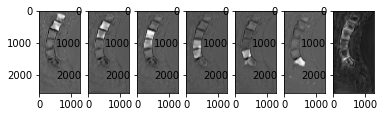

In [ ]:
#채널 하나에 대해 분석
fig = plt.figure()
rows = 1
cols = 7
name = '189'
k1 = np.load('/content/drive/MyDrive/challenge_data_dicom/Store/result/'+name+'.npy')

k2 = np.load('/content/drive/MyDrive/challenge_data_dicom/Store/result/'+name+'.npy')

k3 = np.load('/content/drive/MyDrive/challenge_data_dicom/Store/result/'+name+'.npy')

k4 = np.load('/content/drive/MyDrive/challenge_data_dicom/Store/result/'+name+'.npy')

k5 = np.load('/content/drive/MyDrive/challenge_data_dicom/Store/result/'+name+'.npy')

k6 = np.load('/content/drive/MyDrive/challenge_data_dicom/Store/result/'+name+'.npy')

k7 = np.load('/content/drive/MyDrive/challenge_data_dicom/Store/result/'+name+'.npy')


#########channel 실수 값으로 표현 하기
channel =0
channel1 = 1
channel2 =2
channel3 =3
channel4=4
channel5 =5
channel6=6

# ax1 = fig.add_subplot(rows,cols,1)
# ax1.imshow(k1[...,channel], cmap='gray')

# ax2 = fig.add_subplot(rows,cols,2)
# ax2.imshow(k2[...,channel1], cmap='gray')

# ax3 = fig.add_subplot(rows,cols,3)
# ax3.imshow(k3[...,channel2], cmap='gray')

# ax4 = fig.add_subplot(rows,cols,4)
# ax4.imshow(k4[...,channel3], cmap='gray')

# ax5 = fig.add_subplot(rows,cols,5)
# ax5.imshow(k5[...,channel4], cmap='gray')

# ax6 = fig.add_subplot(rows,cols,6)
# ax6.imshow(k6[...,channel5], cmap='gray')

# ax7 = fig.add_subplot(rows,cols,7)
# ax7.imshow(k7[...,channel6], cmap='gray')

# z-normalization
# for iddx in range(6):
#   bbb=copy.copy(k1[...,iddx])
#   mean = np.mean(bbb)
#   std = np.std(bbb)
#   bbb=(bbb-mean)/std
#   bbb[np.where(bbb <0)] =0
#   bbb[np.where(bbb>0)] = 1
#   k1[...,iddx] = bbb
#   print(bbb.max(),bbb.min())

# bbb=copy.copy(k1[...,6])
# mean = np.mean(bbb)
# std = np.std(bbb)
# bbb=(bbb-mean)/std
# bbb[np.where(bbb <0)] =0
# bbb[np.where(bbb>0)] = 1
# k1[...,6] = 1-bbb

#double z- normalization
# for iddx in range(7):
#   bbb=copy.copy(k1[...,iddx])
#   mean = np.mean(bbb)
#   std = np.std(bbb)
#   bbb=(bbb-mean)/std
#   bbb[np.where(bbb <0)] =0
#   print(bbb.max(),bbb.min())
#   mean = np.mean(bbb)
#   std = np.std(bbb)
#   bbb=(bbb-mean)/std
#   print(bbb.max(),bbb.min())
#   bbb[np.where(bbb <0)] =0
#   bbb[np.where(bbb >0)] = 1
#   k1[...,iddx] = bbb
#   print(bbb.max(),bbb.min())
#   print('\n')


# min-max normalization
# for iddx in range(6):
#   bbb=copy.copy(k1[...,iddx])
#   max = bbb.max()
#   min = bbb.min()
#   term = max - min
#   bbb=(bbb-min)/term
#   mid = 0.5
#   bbb[np.where(bbb <mid)] =0
#   # bbb[np.where(bbb>mid)] = 1
#   k1[...,iddx] = bbb
#   print(bbb.max(),bbb.min())

ax1 = fig.add_subplot(rows,cols,1)
ax1.imshow(k1[...,channel], cmap='gray')

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(k1[...,channel1], cmap='gray')

ax3 = fig.add_subplot(rows,cols,3)
ax3.imshow(k1[...,channel2], cmap='gray')

ax4 = fig.add_subplot(rows,cols,4)
ax4.imshow(k1[...,channel3], cmap='gray')

ax5 = fig.add_subplot(rows,cols,5)
ax5.imshow(k1[...,channel4], cmap='gray')

ax6 = fig.add_subplot(rows,cols,6)
ax6.imshow(k1[...,channel5], cmap='gray')

ax7 = fig.add_subplot(rows,cols,7)
ax7.imshow(k1[...,channel6], cmap='gray')

- ZIP 파일 풀기

1. zip파일을 먼저 바탕화면에서 내가 원하는 이름으로 압축 풀고
내부에 img 폴더를 만들어서 넣고 재압축 할것
2. zip파일을 test 파일에 넣기
3. zip파일 이름은 test2로 할 것.
4. 위에 Dataset2로 데이터 셋 만들 때 val이 아닌 test로 경로 바꿔줄 것.

In [ ]:
# os.chdir 이용방법
#1. os.chdir로 현재 cwd 바꿔준다.
os.chdir('/content/drive/MyDrive/challenge_data_dicom/test/img')

#2. 현재 cwd 확인해보기
os.getcwd()


'/content/drive/MyDrive/challenge_data_dicom/test/img'

In [ ]:
#3. 원하는 zip파일 풀면 cwd에 풀림
!unzip -qq "/content/drive/MyDrive/challenge_data_dicom/test/test2.zip"


- 알고리즘으로 시도


- correlation 연산을 위한 코드

In [ ]:
def corr2d(X, K):
  # Y shape 구하기
  X_height,X_width=X.shape #3,3
  K_height,K_width=K.shape #2,2

  Y_width=X_width - K_width + 1 #2
  Y_height=X_height - K_height + 1 #2
  Y=np.zeros((Y_height,Y_width)) #convolution연산으로 생성될 Y shape에 맞추어 Y 생성
  sum=0

  for width in range(0,Y_width): #0~1
    for height in range(0,Y_height): #0~1
      #height,width는 convolution연산이 시작되는 X의 좌측 상단 좌표
      #kernel 요소 수만큼 연산 진행
      sum=0
      for i in range(width,width+K_width):
        for j in range(height, height+K_height):
          sum+=X[j][i]*K[j-height][i-width] #convolution 연산에 이용되는 kernel의 좌표는 항상 고정되게 설정해줘야 함. => 연산을 진행하는 X의 좌측 상단 좌표를 뺀다.
      Y[height][width]=sum 
   
  return Y

In [ ]:
import PIL.Image as pilimg
import numpy as np
import cv2
import copy
# Read image
im = pilimg.open('/content/drive/MyDrive/challenge_data_dicom/3000.bmp')
 
# Fetch image pixel data to numpy array
pix = np.array(im)
width =200
height = 200
pix = cv2.resize(pix,(width,height),interpolation=cv2.INTER_LINEAR)

In [ ]:
kernel = np.ones((5,5))
print(kernel)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


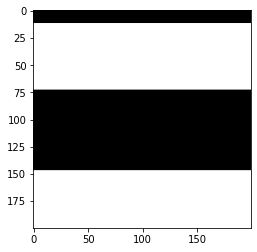

In [ ]:
result_temp = corr2d(pix,kernel)
thd = 255*25*0.21
thd1 = 255*25*0.24
result_real = np.zeros((200,200))
for i in range(196):
  for j in range(196):
    if thd<result_temp[i][j] and result_temp[i][j]<thd1:
      result_real[i:i+25][j:j+25] = 1
# result_temp[np.where((thd<result_temp) & (result_temp<thd1))] = 10
# result_temp[np.where(result_temp != 10)] = 0
# result_temp[np.where(result_temp == 10)] = 1
plt.imshow(result_real,cmap='gray')

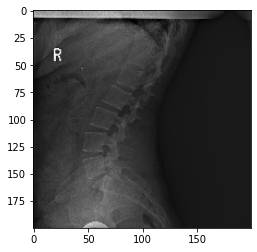

In [ ]:
aaa=copy.copy(pix)
mean = np.mean(aaa)
std = np.std(aaa)
aaa=(aaa-mean)/std
# aaa[np.where(aaa <0)] =0
# aaa[np.where(aaa>0)] = 1
plt.imshow(aaa,cmap='gray')


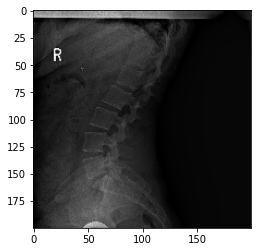

In [ ]:
# mean-std 정규화
bbb=copy.copy(pix)
mean = np.mean(bbb)
std = np.std(bbb)
bbb=(bbb-mean)/std
threshold = -1
bbb[np.where(bbb <threshold)] =threshold
# bbb[np.where(bbb>threshold)] = 1
plt.imshow(bbb,cmap='gray')

In [ ]:
K = np.array([[1.0, -1.0]]) # K: 1 X 2 kernel tensor
K2 = np.array([[1.0],[-1.0]])

print(K.shape)
print(K2.shape)

(1, 2)
(2, 1)


In [ ]:
A = corr2d(pix,K)

for kk in range(199):
  print(A[80][kk])

6.0
0.0
-1.0
1.0
1.0
-3.0
-2.0
-7.0
2.0
-1.0
-8.0
3.0
-6.0
4.0
-2.0
-5.0
10.0
-9.0
-1.0
0.0
-1.0
2.0
0.0
-5.0
2.0
-2.0
4.0
2.0
-1.0
-5.0
7.0
-3.0
1.0
-5.0
4.0
-4.0
-3.0
-11.0
1.0
2.0
9.0
-5.0
2.0
-2.0
-1.0
6.0
-1.0
-3.0
-3.0
2.0
3.0
4.0
-3.0
-8.0
6.0
-2.0
2.0
1.0
-2.0
6.0
-4.0
0.0
6.0
-10.0
-2.0
4.0
-8.0
3.0
4.0
-5.0
1.0
7.0
-9.0
7.0
-2.0
-5.0
1.0
3.0
-6.0
10.0
-1.0
2.0
5.0
-4.0
-1.0
-5.0
-1.0
8.0
0.0
-5.0
-9.0
6.0
7.0
2.0
11.0
-9.0
-2.0
2.0
2.0
4.0
-9.0
2.0
1.0
-8.0
15.0
-3.0
14.0
2.0
-5.0
5.0
0.0
-4.0
0.0
-1.0
1.0
2.0
5.0
0.0
4.0
1.0
1.0
-2.0
-1.0
0.0
-1.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


(199, 199)
[[0. 0. 0. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


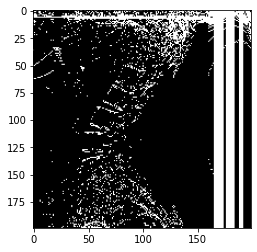

In [ ]:
A = corr2d(pix,K)
B = corr2d(pix,K2)

height =A.shape[0]
width = A.shape[1]

fig = plt.figure()
rows = 1
cols = 3

#가로로
for i in range(height):
  mean = np.mean(A[i])
  std = np.std(A[i])
  A[i] = (A[i]-mean)/std
  threshold = 0.5*std
  A[i][np.where((A[i]>threshold) |(A[i]<-1*threshold))] =2000
  A[i][np.where((A[i]<threshold) &(A[i]>-1*threshold))] =0
  A[i][np.where(A[i]==2000)] =1

#세로로
for j in range(width):
  mean1 = np.mean(B[:,j])
  std1 = np.std(B[:,j])
  B[:,j] = (B[:,j]-mean1)/std1
  threshold1 = std1*0.08
  B[:,j][np.where((B[:,j]>threshold1) |(B[:,j]<-1*threshold1))] =2000
  B[:,j][np.where((B[:,j]<threshold1) &(B[:,j]>-1*threshold1))] =0
  B[:,j][np.where(B[:,j]==2000)] =1


A= A[:199]
B= B[:,:199]
print(B.shape)

# a1 = fig.add_subplot(rows,cols,1)
# a1.imshow(A, cmap='gray')

# a2 = fig.add_subplot(rows,cols,2)
# a2.imshow(B, cmap='gray')

# a3 = fig.add_subplot(rows,cols,3)
# a3.imshow(A+B, cmap='gray')
plt.imshow(B,cmap='gray')
print(B)

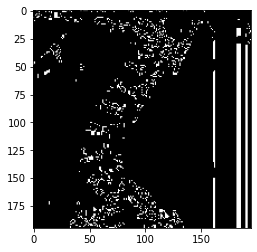

In [ ]:
result_temp = corr2d(B,kernel)
thd = 25*0.17
thd1 = 25*0.24
result_real = np.zeros((200,200))
# for i in range(196):
#   for j in range(196):
#     if thd<result_temp[i][j] and result_temp[i][j]<thd1:
#       result_real[i:i+25][j:j+25] = 1
result_temp[np.where((thd<result_temp) & (result_temp<thd1))] = 10
result_temp[np.where(result_temp != 10)] = 0
result_temp[np.where(result_temp == 10)] = 1
plt.imshow(result_temp,cmap='gray')
